In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# df = pd.read_csv("housing.csv", header=None)
# https://www.kaggle.com/datasets/vikrishnan/boston-house-prices?resource=download
df = pd.read_csv("1958881A4B17C8519E.csv")
df.info()
 # [01]  CRIM	자치시(town) 별 1인당 범죄율
 # [02]  ZN	25,000 평방피트를 초과하는 거주지역의 비율
 # [03]  INDUS	비소매상업지역이 점유하고 있는 토지의 비율
 # [04]  CHAS	찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
 # [05]  NOX	10ppm 당 농축 일산화질소
 # [06]  RM	주택 1가구당 평균 방의 개수
 # [07]  AGE	1940년 이전에 건축된 소유주택의 비율
 # [08]  DIS	5개의 보스턴 직업센터까지의 접근성 지수
 # [09]  RAD	방사형 도로까지의 접근성 지수
 # [10]  TAX	10,000 달러 당 재산세율
 # [11]  PTRATIO	자치시(town)별 학생/교사 비율
 # [12]  B	1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.
 # [13]  LSTAT	모집단의 하위계층의 비율(%)
 # [14]  MEDV	본인 소유의 주택가격(중앙값) (단위: $1,000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [4]:
# iloc[행범위,열범위]
X = df.iloc[:,:-2]
y = df.iloc[:,-2]
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [6]:
line_fitter = LinearRegression()
line_fitter.fit(x_train, y_train)

LinearRegression()

In [21]:
y_predict= line_fitter.predict(x_test)
y_predict_solo= line_fitter.predict([[0.07950, 60.0, 1.69, 0, 0.411, 6.579, 35.9, 10.7103, 4, 411, 18.3, 370.78, 5.49]])
y_predict_solo

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([20.26184958])

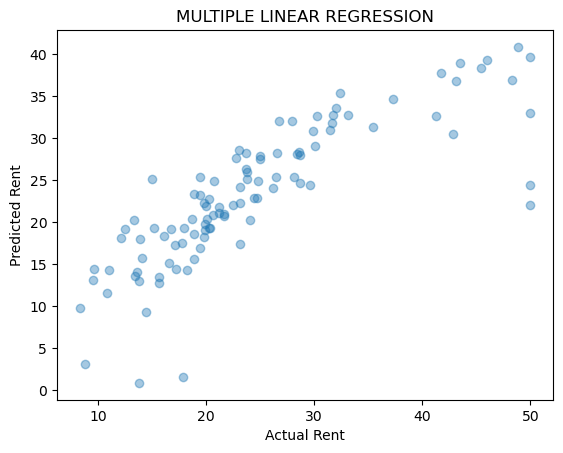

In [22]:
import matplotlib.pyplot as plt

# x축은 실제 MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)
# y축은 예측한 MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)

plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [23]:
# 결정계수
line_fitter.score(x_train, y_train)

0.7616279588376553

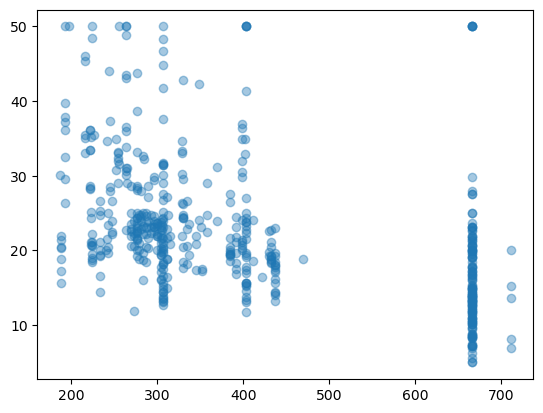

In [11]:
# 'TAX' 10,000 달러 당 재산세율과 가격 'MEDV' 상관관계
plt.scatter(df[['TAX']], df[['MEDV']], alpha=0.4)
plt.show()

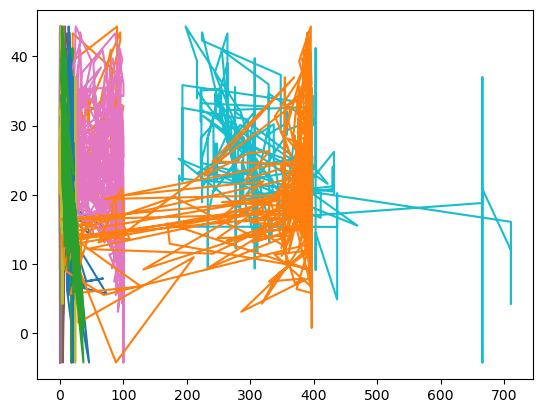

In [26]:
# 피처의 연관관계 확인
# plt.plot(X, y, 'o')
plt.plot(X,line_fitter.predict(X))
plt.show()